In [5]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install findspark


Note: you may need to restart the kernel to use updated packages.


In [11]:
import findspark
findspark.init()

from pyspark.sql import SparkSession


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

# Создаем SparkSession
spark = SparkSession.builder \
    .appName("NCHS - Leading Causes of Death: United States") \
    .master("local[*]") \
    .getOrCreate()

# Определяем схему для данных
schema = StructType([
    StructField("Year", IntegerType(), True),
    StructField("Cause Code", StringType(), True),
    StructField("Cause Name", StringType(), True),
    StructField("State", StringType(), True),
    StructField("Deaths", IntegerType(), True),
    StructField("Age-adjusted Death Rate", DoubleType(), True)
])

# Загружаем CSV файл
data = spark.read.option("header", "true").schema(schema).csv("D:\загрузки\data.csv")

# Регистрируем временную таблицу для SQL запросов
data.createOrReplaceTempView("death_data")

# 0. Выводим csv на экран
showAll = spark.sql("SELECT * FROM death_data")
showAll.show()

+----+--------------------+--------------------+--------------------+------+-----------------------+
|Year|          Cause Code|          Cause Name|               State|Deaths|Age-adjusted Death Rate|
+----+--------------------+--------------------+--------------------+------+-----------------------+
|2017|Accidents (uninte...|Unintentional inj...|       United States|169936|                   49.4|
|2017|Accidents (uninte...|Unintentional inj...|             Alabama|  2703|                   53.8|
|2017|Accidents (uninte...|Unintentional inj...|              Alaska|   436|                   63.7|
|2017|Accidents (uninte...|Unintentional inj...|             Arizona|  4184|                   56.2|
|2017|Accidents (uninte...|Unintentional inj...|            Arkansas|  1625|                   51.8|
|2017|Accidents (uninte...|Unintentional inj...|          California| 13840|                   33.2|
|2017|Accidents (uninte...|Unintentional inj...|            Colorado|  3037|               

In [3]:
result = spark.sql("SELECT * FROM death_data WHERE Year = 2012")
result.show()

+----+--------------------+--------------------+--------------------+------+-----------------------+
|Year|          Cause Code|          Cause Name|               State|Deaths|Age-adjusted Death Rate|
+----+--------------------+--------------------+--------------------+------+-----------------------+
|2012|Accidents (uninte...|Unintentional inj...|             Alabama|  2283|                   46.6|
|2012|Accidents (uninte...|Unintentional inj...|              Alaska|   368|                   54.1|
|2012|Accidents (uninte...|Unintentional inj...|             Arizona|  3029|                   45.1|
|2012|Accidents (uninte...|Unintentional inj...|            Arkansas|  1521|                   50.0|
|2012|Accidents (uninte...|Unintentional inj...|          California| 10906|                   28.0|
|2012|Accidents (uninte...|Unintentional inj...|            Colorado|  2403|                   47.1|
|2012|Accidents (uninte...|Unintentional inj...|         Connecticut|  1392|               

In [4]:
result = spark.sql("SELECT State, SUM(Deaths) as Total_Deaths FROM death_data GROUP BY State")
result.show()


+--------------------+------------+
|               State|Total_Deaths|
+--------------------+------------+
|                Utah|      472567|
|              Hawaii|      320652|
|           Minnesota|     1288025|
|                Ohio|     3716207|
|            Arkansas|      987455|
|              Oregon|     1064013|
|               Texas|     5535028|
|        North Dakota|      202091|
|        Pennsylvania|     4304492|
|         Connecticut|      981027|
|            Nebraska|      513032|
|             Vermont|      179348|
|       United States|    84009152|
|              Nevada|      652604|
|          Washington|     1635078|
|            Illinois|     3489953|
|            Oklahoma|     1243157|
|District of Columbia|      168907|
|            Delaware|      255015|
|              Alaska|      117890|
+--------------------+------------+
only showing top 20 rows



In [5]:
result = spark.sql("""
    SELECT State, AVG(`Age-adjusted Death Rate`) AS Avg_Age_Adjusted_Death_Rate
    FROM death_data
    WHERE Year = 2017
    GROUP BY State
    ORDER BY Avg_Age_Adjusted_Death_Rate DESC
""")
result.show()


+--------------+---------------------------+
|         State|Avg_Age_Adjusted_Death_Rate|
+--------------+---------------------------+
|   Mississippi|         152.20909090909086|
| West Virginia|         150.53636363636363|
|      Kentucky|         145.94545454545457|
|      Oklahoma|         145.61818181818182|
|      Arkansas|         144.71818181818182|
|       Alabama|         144.61818181818182|
|     Tennessee|         141.93636363636367|
|     Louisiana|         140.16363636363639|
|          Ohio|         134.27272727272728|
|       Indiana|         133.30909090909088|
|      Missouri|         130.64545454545453|
|South Carolina|         129.93636363636364|
|      Michigan|         125.19090909090909|
|       Georgia|                      124.8|
|North Carolina|         123.05454545454542|
|        Nevada|         122.57272727272725|
|  Pennsylvania|                      122.4|
|         Maine|         121.58181818181819|
|        Kansas|         120.34545454545454|
|      Del

['Year', 'Cause Code', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate']
root
 |-- Year: integer (nullable = true)
 |-- Cause Code: string (nullable = true)
 |-- Cause Name: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Age-adjusted Death Rate: double (nullable = true)



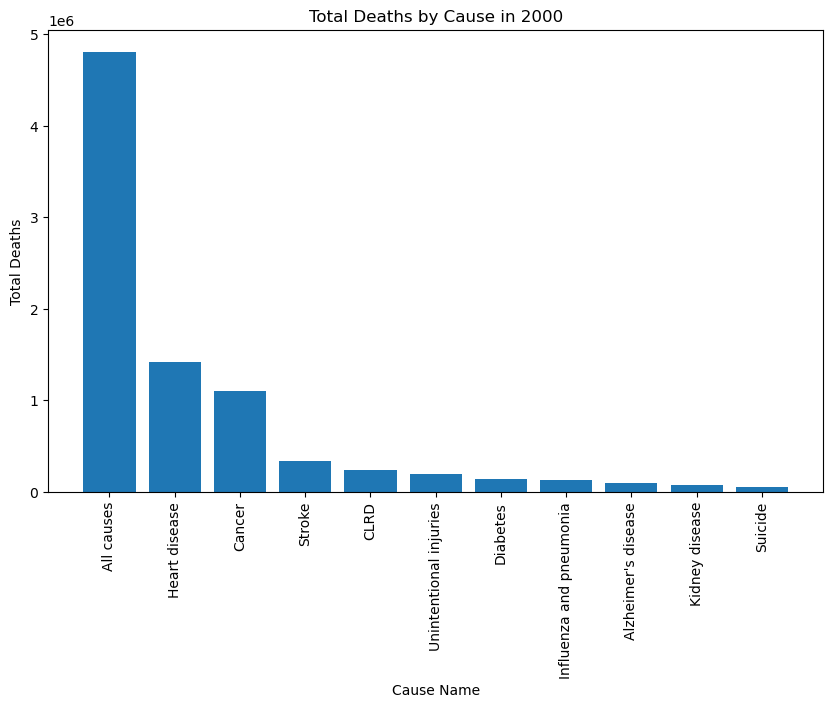

In [21]:
print(data.columns)

data.printSchema()

result = spark.sql("""
SELECT `Cause Name`, SUM(Deaths) AS Total_Deaths 
FROM death_data 
WHERE Year = 2000
GROUP BY `Cause Name`
ORDER BY Total_Deaths DESC
""")

result_pd = result.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(result_pd['Cause Name'], result_pd['Total_Deaths'])
plt.xticks(rotation=90)
plt.xlabel('Cause Name')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Cause in 2000')
plt.show()


['Year', 'Cause Code', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate']
root
 |-- Year: integer (nullable = true)
 |-- Cause Code: string (nullable = true)
 |-- Cause Name: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Age-adjusted Death Rate: double (nullable = true)



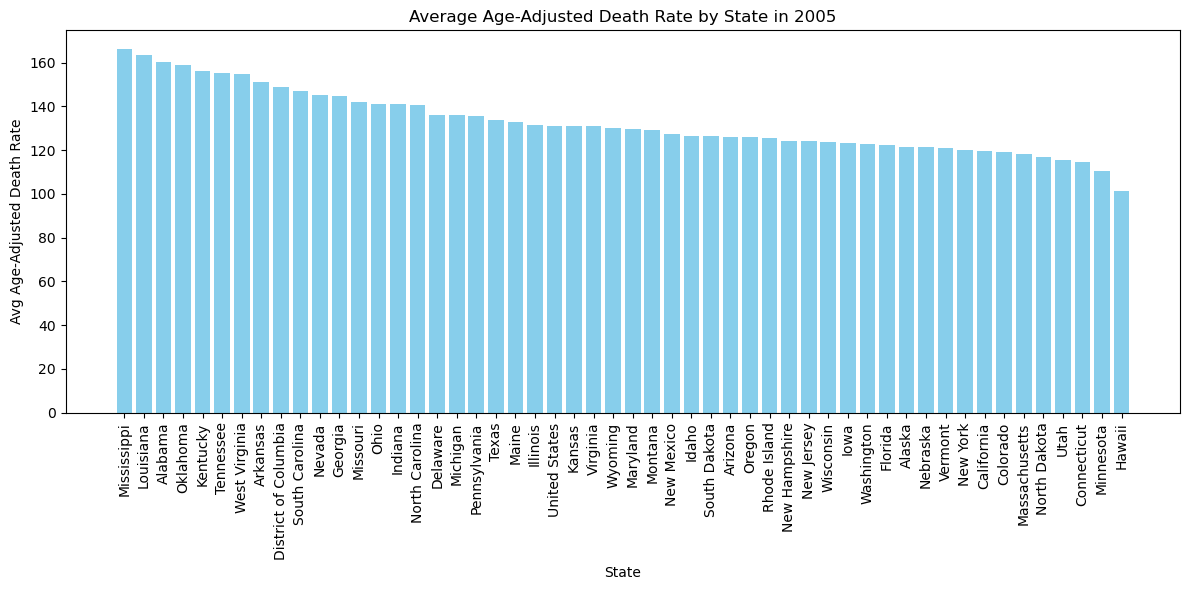

In [25]:

print(data.columns)


data.printSchema()

result = spark.sql("""
SELECT State, AVG(`Age-adjusted Death Rate`) AS Avg_Age_Adjusted_Death_Rate
FROM death_data 
WHERE Year = 2005 
GROUP BY State
ORDER BY Avg_Age_Adjusted_Death_Rate DESC
""")

result_pd = result.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(result_pd['State'], result_pd['Avg_Age_Adjusted_Death_Rate'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Avg Age-Adjusted Death Rate')
plt.title('Average Age-Adjusted Death Rate by State in 2005')
plt.tight_layout()
plt.show()

In [1]:
spark.stop()

NameError: name 'spark' is not defined